In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data : 
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Cheking for missing values : 
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data = data.drop_duplicates()

In [6]:
data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [7]:
# Select the columns :
categorical = ["job", "marital", "education", "contact","month","poutcome"]

for features in categorical :
    data[features] = data[features].astype('category').cat.codes

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


____

# Clustering method (K-means) :  

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Identify features that might represent high-value customers, baccount balance, customer age, duration , previous .

In [10]:
# define the variables used in the clustering model :
X = data [[ 'age' , 'balance' , 'duration' , 'previous' ]]

### Elbow method : (to determine the optimal k) 

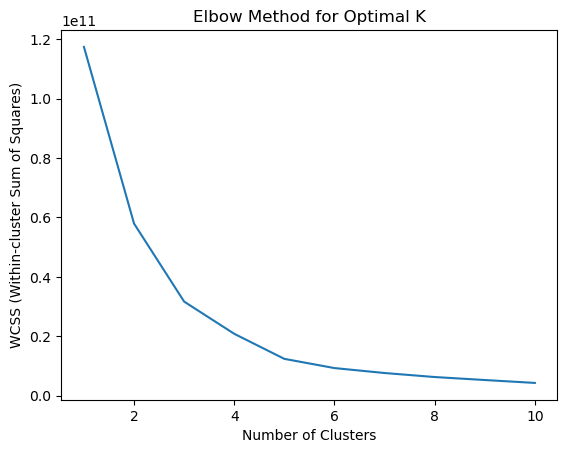

In [11]:
# Elbow Method
wcss = []
for i in range(1, 11):  # Try K values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')

# Save the plot as a PNG file
plt.savefig('elbow_method.png', format='png', dpi=300)

# Show the plot
plt.show()

The optimal number of k is 3

In [12]:
# Apply K-means with the chosen K (e.g., K=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
data['Cluster'] = y_kmeans

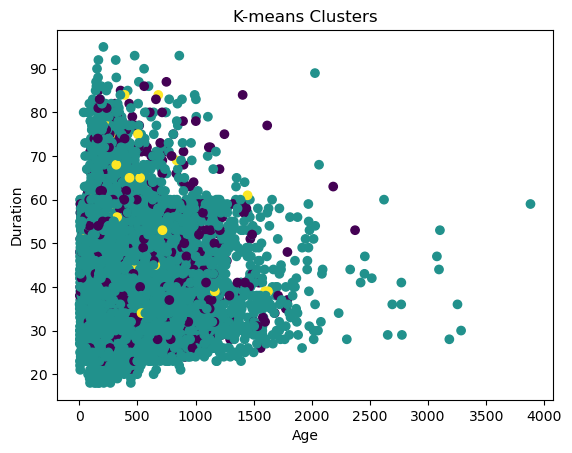

In [13]:
# Visualize the clusters with 'duration' vs. 'age'
plt.scatter(data['duration'], data['age'], c=data['Cluster'], cmap='viridis')
plt.title('K-means Clusters')
plt.xlabel('Age')
plt.ylabel('Duration')

# Save the plot as a PNG file
plt.savefig('kmeans_clusters1.png', format='png', dpi=300)

# Show the plot
plt.show()


_____